# 2. 선형 모델(Linear Models)
- 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행
- 회귀 분석을 위한 선형 모델은 다음 과 같이 정의
    - ![](images/2023-03-20-15-44-54.png)

## 선형 회귀(Linear Regression)
- 선형 회귀(Linear Regression) 또는 최소제곱법(Ordinary Least Squares)은 가장 간단한 회귀 분석을 위한 선형 모델
- 선형 회귀는 모델의 예측과 정답 사이의 평균제곱오차(Mean Squared Error)를 최소화 하는 학습 파라미터 w를 찾음
    - ![](images/2023-03-20-15-47-39.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(["seaborn-whitegrid"])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_1519/460413633.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-whitegrid"])


## 캘리포니아 주택 가격 데이터
![](images/2023-03-20-16-09-54.png)

In [2]:
from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 가격 데이터 불러오기
california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [3]:
# 데이터프레임으로 만들기
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df["Target"] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 피처데이터 정보

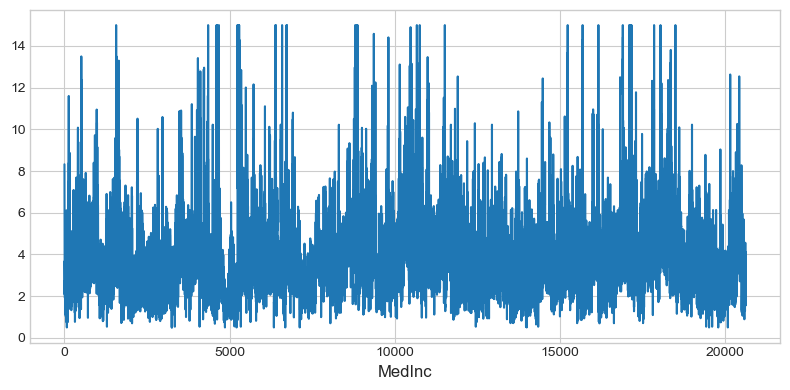

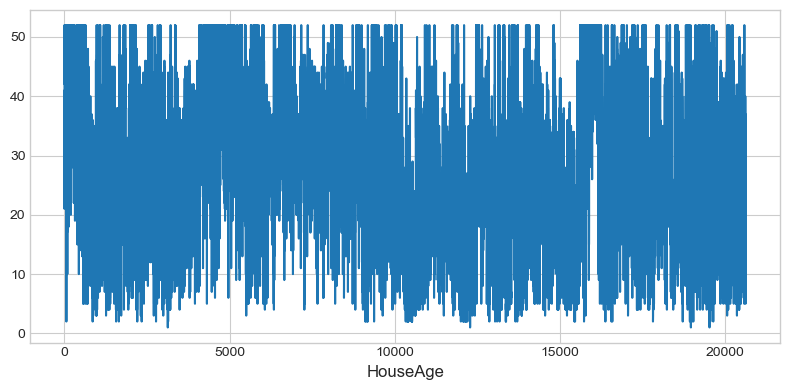

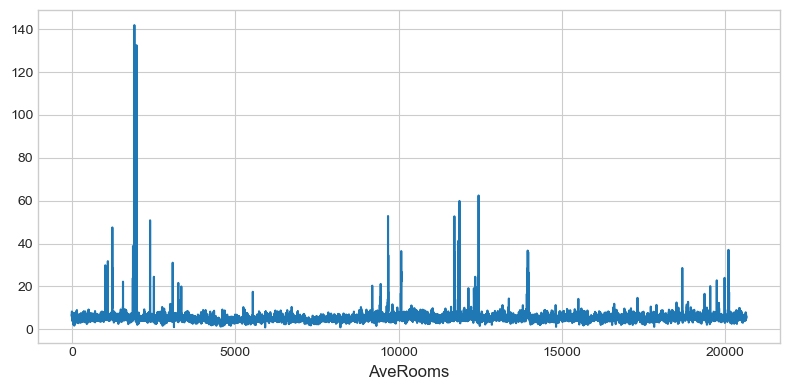

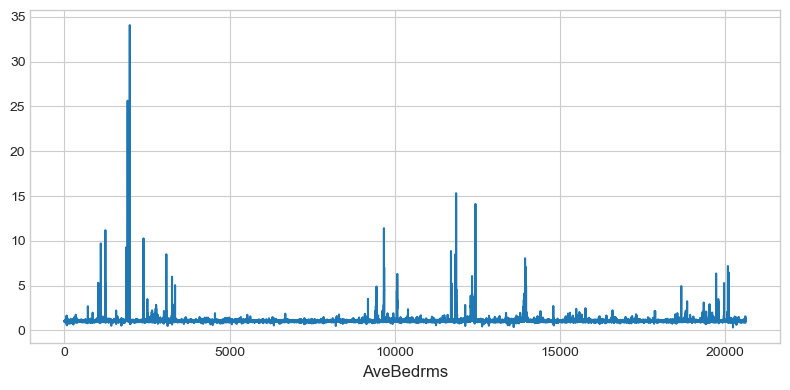

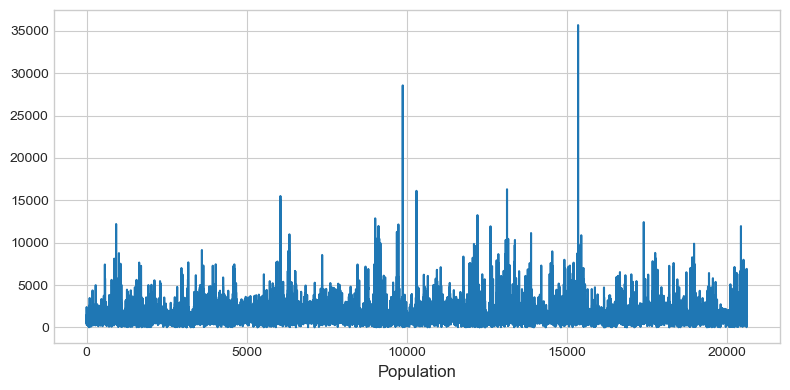

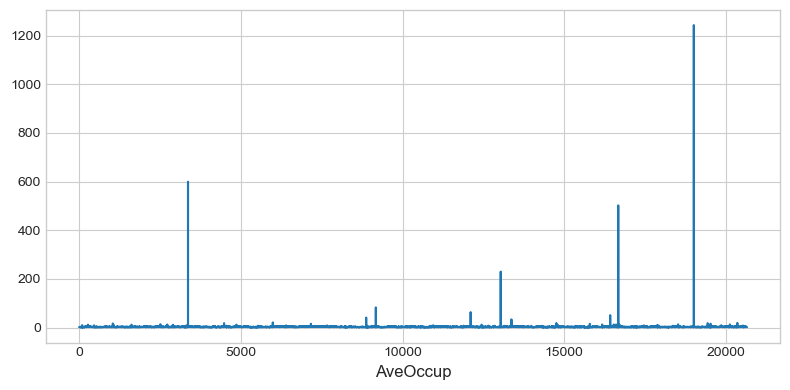

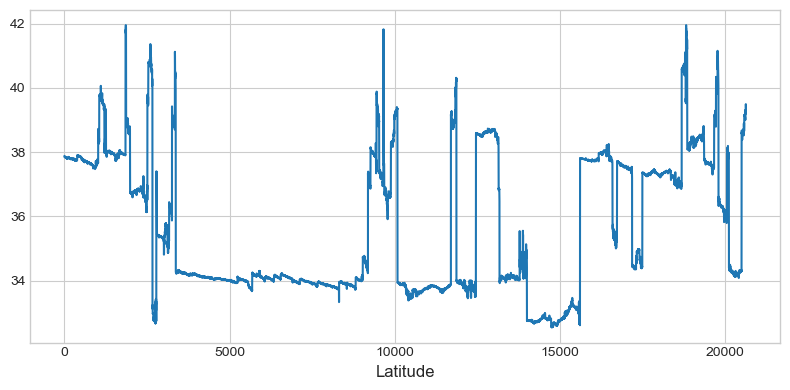

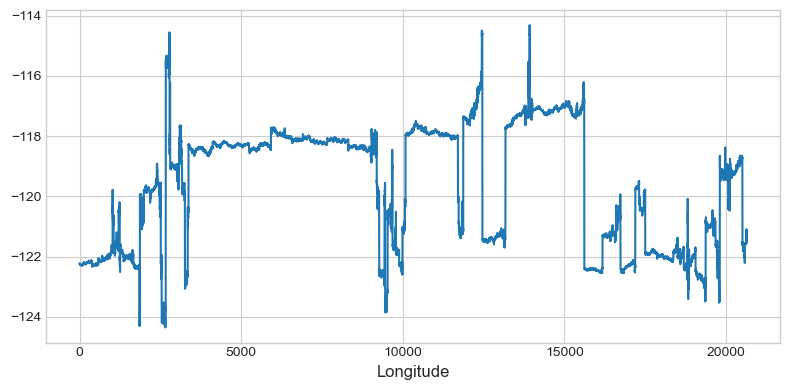

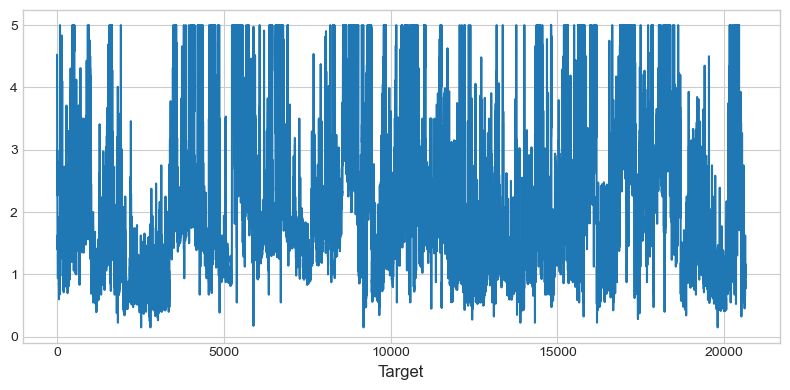

In [8]:
for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8, 4))
    plt.plot(california_df[col])
    plt.xlabel(col, size=12)
    plt.tight_layout()

### 피처 데이터와 타겟 데이터 상관 관계 정보

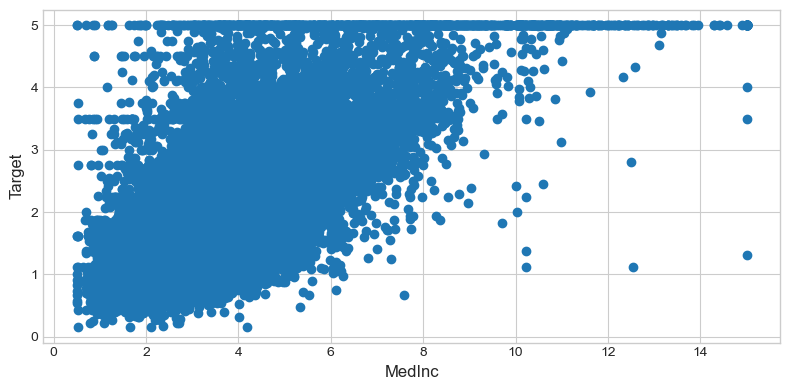

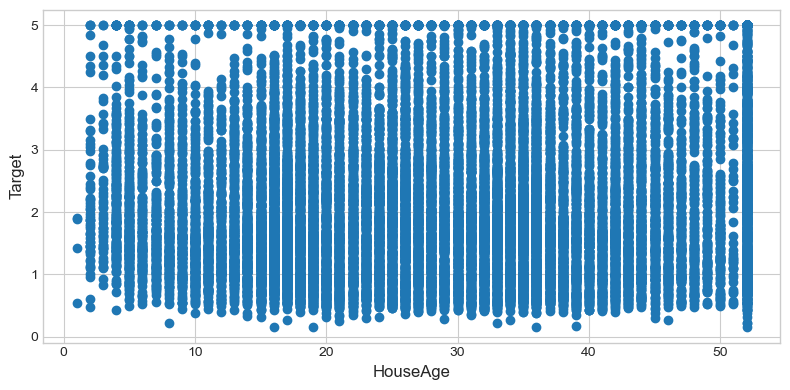

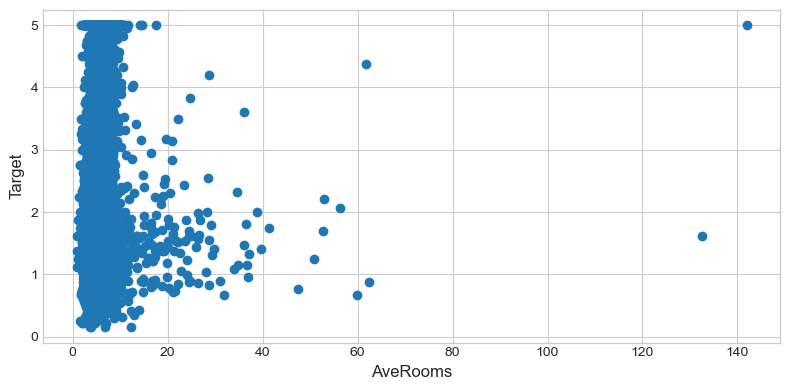

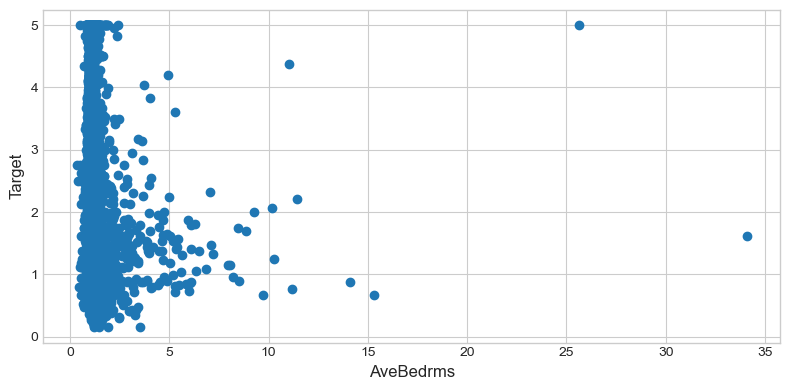

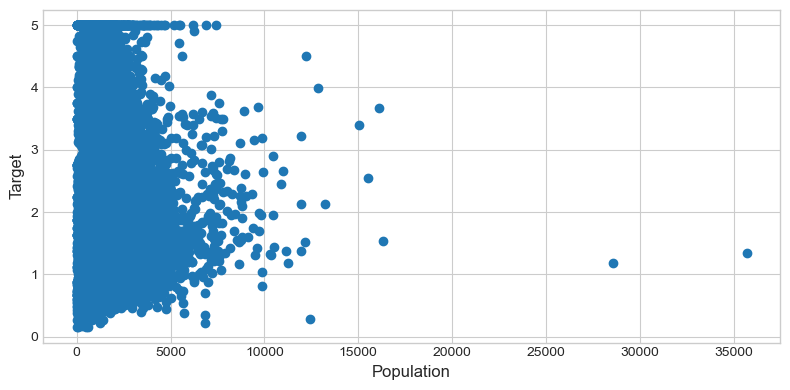

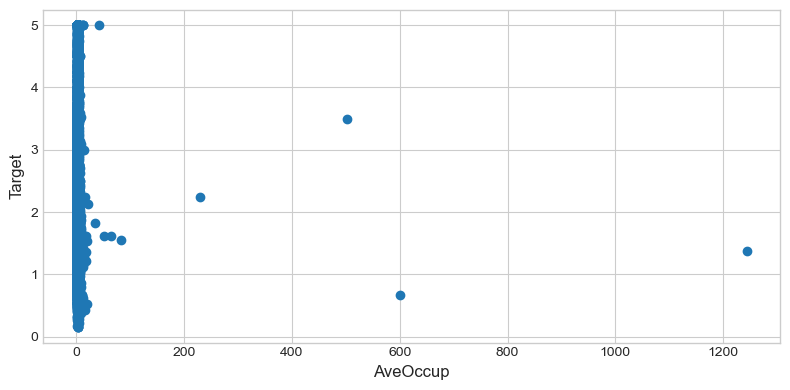

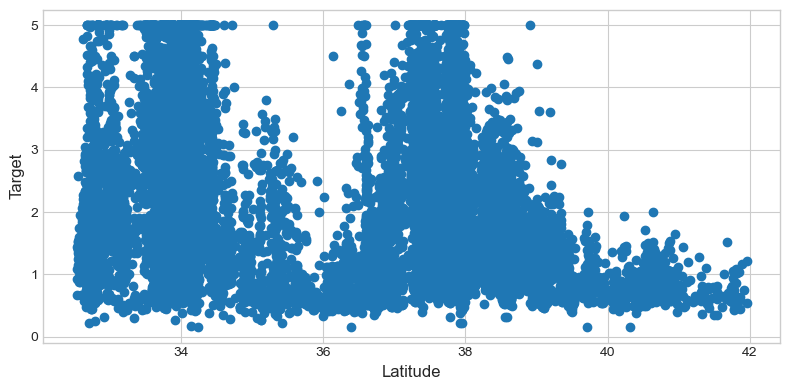

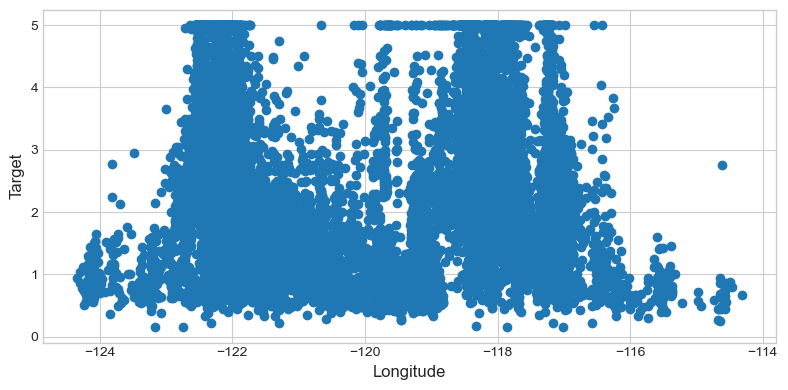

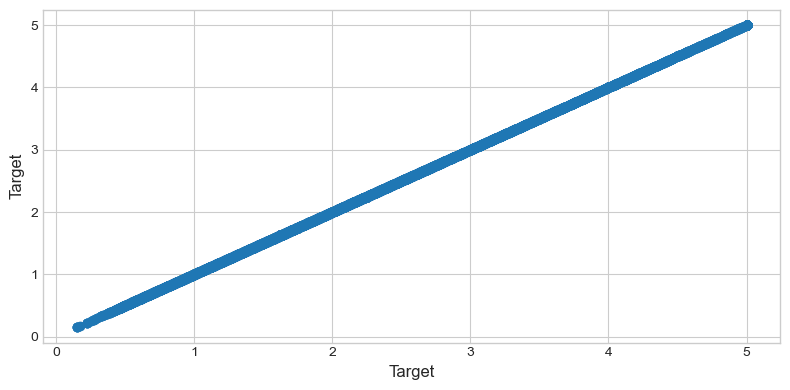

In [9]:
for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8, 4))
    plt.scatter(california_df[col], california_df["Target"])
    plt.xlabel(col, size=12)
    plt.ylabel("Target", size=12)
    plt.tight_layout()

### 위도, 경도 데이터 시각화

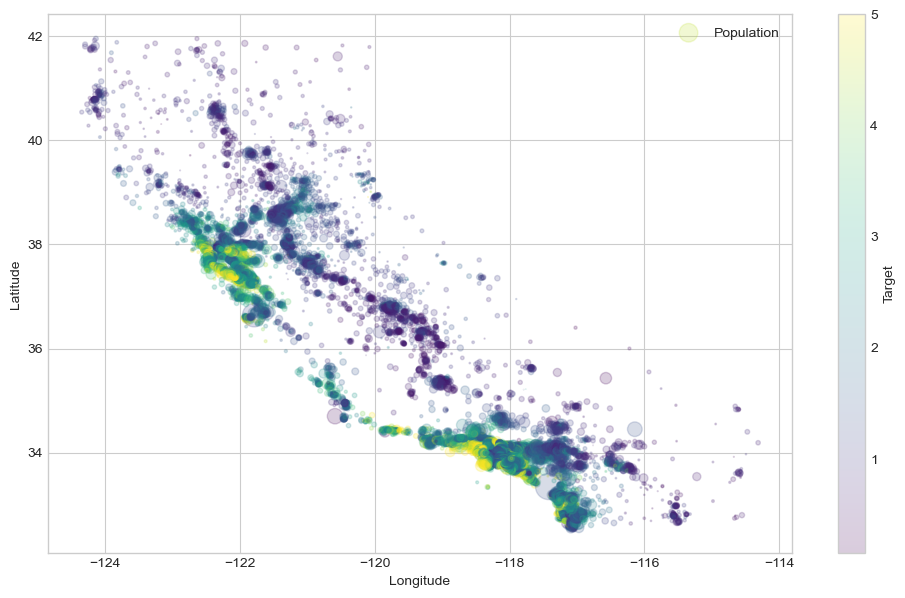

In [20]:
california_df.plot(kind='scatter', x="Longitude", y="Latitude", figsize=(12, 7),
                   s=california_df["Population"]/100, alpha=0.2, label="Population",
                   c="Target", cmap=plt.get_cmap("viridis"), colorbar=True);

## 캘리포니아 주택 가격 데이터 선형 회귀

훈련 데이터 점수: 0.605060079757882
평가 데이터 점수: 0.6104546894797873
Train RMSE: 0.725293920132859
Test RMSE: 0.7197380534040616


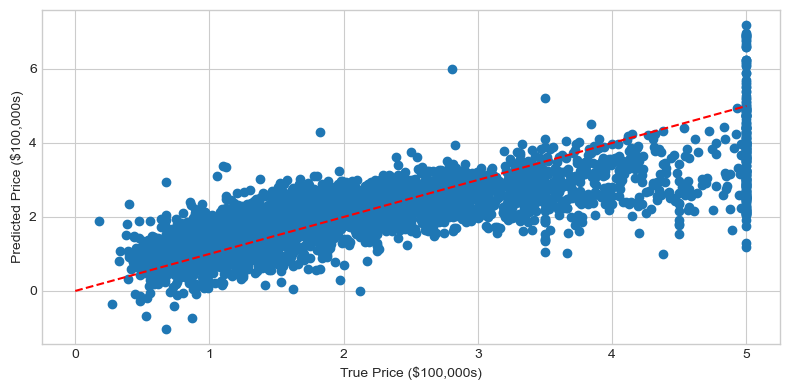

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=123)

# LinearRegression 모델 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 모델 평가
print("훈련 데이터 점수: {}".format(lr.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(lr.score(X_test, y_test)))

# 학습 데이터에 대한 예측값
y_train_pred = lr.predict(X_train)

# 학습 데이터에 대한 예측값 평가
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

# 평가 데이터에 대한 예측값
y_test_pred = lr.predict(X_test)

# 평가 데이터에 대한 예측값 평가
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

# 시각화
def plot_california_prices(expected, predicted):
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.xlabel("True Price ($100,000s)")
    plt.ylabel("Predicted Price ($100,000s)")
    plt.plot([0, 5], [0, 5], "--r")
    plt.tight_layout()

plot_california_prices(y_test, y_test_pred)

In [71]:
# 회귀식
y = print("y = " + str(lr.intercept_))
for i, coef in enumerate(lr.coef_):
    print(str(coef) + " + X*" + str(i))

y = -36.2556193989851
0.4399882480861466 + X*0
0.009157703582543922 + X*1
-0.11182773461221845 + X*2
0.6478579075592742 + X*3
-6.550681054049226e-06 + X*4
-0.003923302148809091 + X*5
-0.4170338051812699 + X*6
-0.427676549994114 + X*7


### 교차 검증

In [72]:
from sklearn.model_selection import cross_val_score

# NMSE
NMSE_score = cross_val_score(lr, california.data, california.target, cv=10, scoring="neg_mean_squared_error")
print("NMSE: {}".format(NMSE_score))
print("NMSE mean: {}".format(NMSE_score.mean()))
print()

# R2
R2_score = cross_val_score(lr, california.data, california.target, cv=10, scoring="r2")
print("R2: {}".format(R2_score))
print("R2 mean: {}".format(R2_score.mean()))

NMSE: [-0.48922052 -0.43335865 -0.8864377  -0.39091641 -0.7479731  -0.52980278
 -0.28798456 -0.77326441 -0.64305557 -0.3275106 ]
NMSE mean: -0.5509524296956645

R2: [0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]
R2 mean: 0.5110068610523767


## 캘리포니아 주택 가격 데이터 릿지 회귀
- 릿지 회귀는 선형 회귀를 개선한 선형 모델
- 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
- 이러한 방법은 각각의 피처(특성)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
- 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
- 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
- 릿지 회귀는 다음과 같은 함수를 최소화하는 파라미터 w를 찾음
    - ![](images/2023-03-21-13-40-25.png)

훈련 데이터 점수: 0.6050600781009445
평가 데이터 점수: 0.6104547389453987
Train RMSE: 0.725293921654314
Test RMSE: 0.7197380077068307


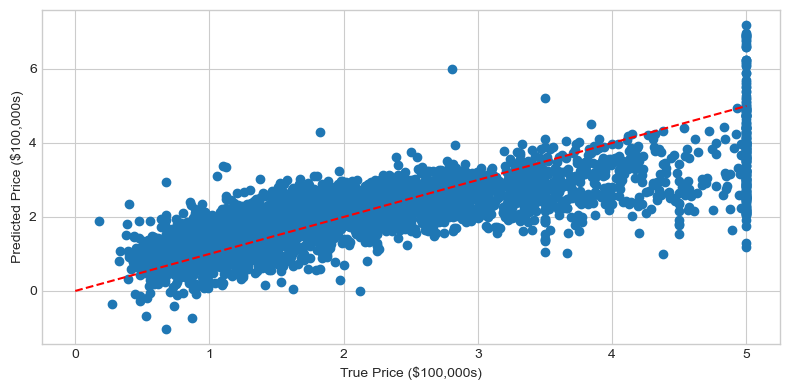

In [73]:
from sklearn.linear_model import Ridge

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=123)

# Ridge 모델 학습
ridge = Ridge(alpha=0.2)
ridge.fit(X_train, y_train)

# 모델 평가
print("훈련 데이터 점수: {}".format(ridge.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(ridge.score(X_test, y_test)))

# 학습 데이터에 대한 예측값
y_train_pred = ridge.predict(X_train)

# 학습 데이터에 대한 예측값 평가
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

# 평가 데이터에 대한 예측값
y_test_pred = ridge.predict(X_test)

# 평가 데이터에 대한 예측값 평가
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

# 시각화
plot_california_prices(y_test, y_test_pred)

## 캘리포니아 주택 가격 데이터 라쏘 회귀
- 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
- 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
- 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 w를 찾음
    - ![](images/2023-03-21-13-48-33.png)
- 라쏘 회귀도 매개변수인 a 값을 통해 규제의 가도 조절 가능

훈련 데이터 점수: 0.605022245331682
평가 데이터 점수: 0.610432311478489
Train RMSE: 0.7253286601283875
Test RMSE: 0.7197380077068307


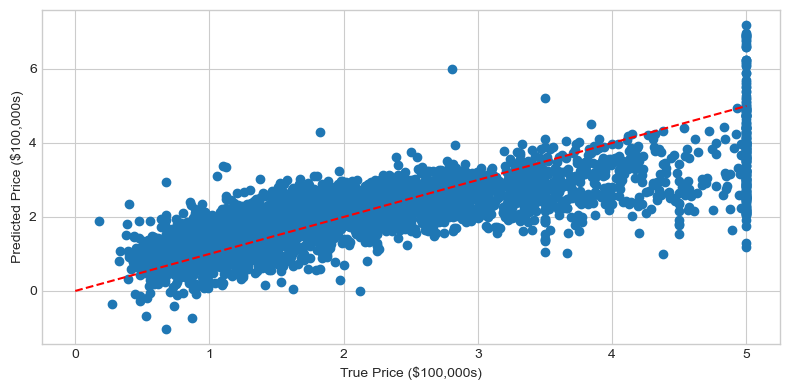

In [74]:
from sklearn.linear_model import Lasso

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=123)

# Lasso 모델 학습
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# 모델 평가
print("훈련 데이터 점수: {}".format(lasso.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(lasso.score(X_test, y_test)))

# 학습 데이터에 대한 예측값
y_train_pred = lasso.predict(X_train)

# 학습 데이터에 대한 평가
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

# 평가 데이터에 대한 예측값
y_test_pred = ridge.predict(X_test)

# 평가 데이터에 대한 예측값 평가
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

# 시각화
plot_california_prices(y_test, y_test_pred)

## 캘리포니아 주택 가격 데이터 신축망
- 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
- 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
- 데이터의 특성이 많거나 서로 상관 관계가 높은 특성이 존재할 때 위의 두 모델보다 좋은 성능을 보여줌
- 신축망은 다음과 같은 함수를 최소화 하는 파라미터 w를 찾음
    - ![](images/2023-03-21-13-52-48.png)

훈련 데이터 점수: 0.6033219957746857
평가 데이터 점수: 0.6088137227867183
Train RMSE: 0.7268881345472876
Test RMSE: 0.72125241506977


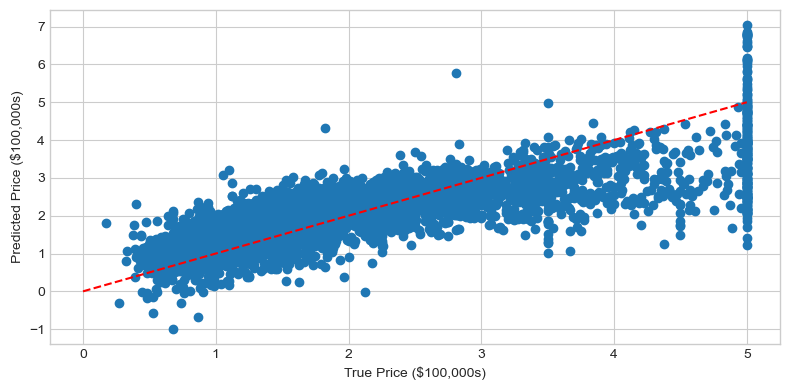

In [77]:
from sklearn.linear_model import ElasticNet

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=123)

# 신축망 모델 학습
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)

# 모델 평가
print("훈련 데이터 점수: {}".format(elasticnet.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(elasticnet.score(X_test, y_test)))

# 학습 데이터에 대한 예측값
y_train_pred = elasticnet.predict(X_train)

# 학습 데이터에 대한 평가
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

# 평가 데이터에 대한 예측값
y_test_pred = elasticnet.predict(X_test)

# 평가 데이터에 대한 예측값 평가
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

# 시각화
plot_california_prices(y_test, y_test_pred)

## 캘리포니아 주택 가격 데이터 직교 정합 추구
- 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법
- 직교 정합 추구 방법은 다음을 만족하는 파라미터 w를 찾는 것이 목표
    - ![](images/2023-03-21-13-56-25.png)
- 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거하도록 만들 수 있음
- 직교 정합 추구 방법은 가중치 벡터 w에서 0이 아닌 값이 k개 이하가 되도록 훈련됨
- 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능
    - ![](images/2023-03-21-14-00-01.png)

훈련 데이터 점수: 0.5970726895713699
평가 데이터 점수: 0.6056019785300861
Train RMSE: 0.73259149482794
Test RMSE: 0.7242072004603965


/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


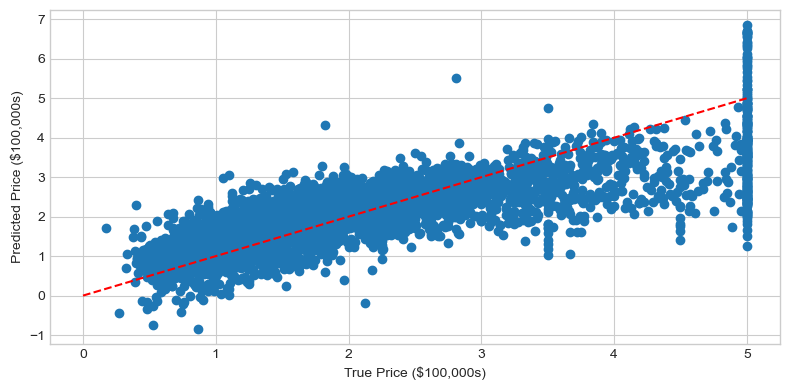

In [81]:
from sklearn.linear_model import OrthogonalMatchingPursuit

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=123)

# 직교 정합 추구 모델 학습(가중치에 제한)
OMP = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
OMP.fit(X_train, y_train)

# 모델 평가
print("훈련 데이터 점수: {}".format(OMP.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(OMP.score(X_test, y_test)))

# 학습 데이터에 대한 예측값
y_train_pred = OMP.predict(X_train)

# 학습 데이터에 대한 평가
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

# 평가 데이터에 대한 예측값
y_test_pred = OMP.predict(X_test)

# 평가 데이터에 대한 예측값 평가
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

# 시각화
plot_california_prices(y_test, y_test_pred)

훈련 데이터 점수: 0.605060079757882
평가 데이터 점수: 0.6104546894797869
Train RMSE: 0.725293920132859
Test RMSE: 0.719738053404062


/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_omp.py:757: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, sel

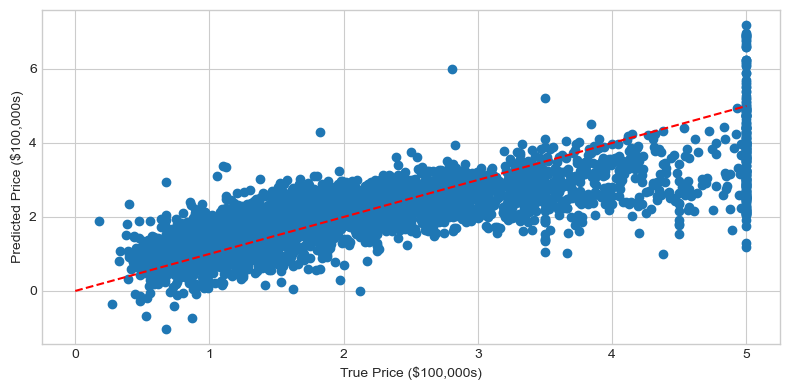

In [83]:
# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=123)

# 직교 정합 추구 모델 학습(오차제곱 합에 제한)
OMP = OrthogonalMatchingPursuit(tol=1.)
OMP.fit(X_train, y_train)

# 모델 평가
print("훈련 데이터 점수: {}".format(OMP.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(OMP.score(X_test, y_test)))

# 학습 데이터에 대한 예측값
y_train_pred = OMP.predict(X_train)

# 학습 데이터에 대한 평가
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

# 평가 데이터에 대한 예측값
y_test_pred = OMP.predict(X_test)

# 평가 데이터에 대한 예측값 평가
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

# 시각화
plot_california_prices(y_test, y_test_pred)

## 캘리포니아 주택 가격 데이터 다항 회귀
- 입력 데이터를 비선형 변환 후 사용하는 방법
- 모델 자체는 선형 모델
    - ![](images/2023-03-21-14-04-49.png)
- 차수가 높아질수록 더 복잡한 데이터 학습 가능
    - ![](images/2023-03-21-14-04-55.png)

훈련 데이터 점수: 0.6808405437858649
평가 데이터 점수: 0.6028532846882406
Train RMSE: 0.6520071797529191
Test RMSE: 0.726726441764861


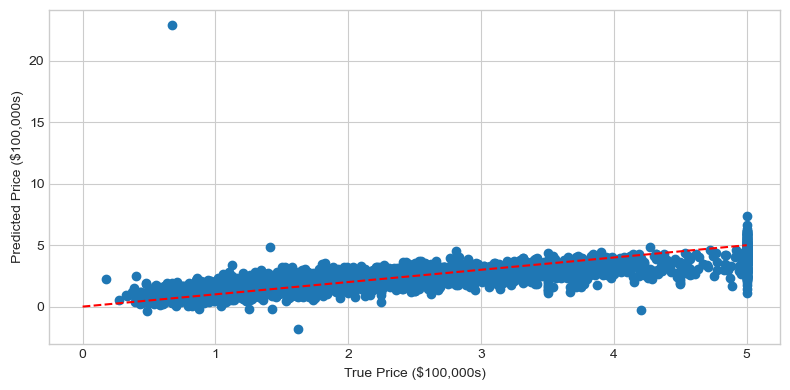

In [84]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# 학습/테스트 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=123)

# 다항회귀 모델 학습
model = make_pipeline(PolynomialFeatures(degree=2),
                      StandardScaler(),
                      LinearRegression())
model.fit(X_train, y_train)

# 모델 평가
print("훈련 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

# 학습 데이터에 대한 예측값
y_train_pred = model.predict(X_train)

# 학습 데이터에 대한 평가
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))

# 평가 데이터에 대한 예측값
y_test_pred = model.predict(X_test)

# 평가 데이터에 대한 예측값 평가
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

# 시각화
plot_california_prices(y_test, y_test_pred)